In [49]:
import yfinance as yf
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

from utils import *



In [51]:
btc = yf.Ticker("BTC-USD").history(period="20y",interval = '1d')
# btc  = btc['Close'].dropna()
# btc=btc['2016':]


In [52]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-10-25,19344.964844,20348.412109,19261.447266,20095.857422,47761524910,0,0
2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,58895950537,0,0
2022-10-27,20772.802734,20854.044922,20255.373047,20285.835938,49625110402,0,0


In [53]:
def murray(df,l=100,m=0.125):
    
    """
    I translated the code from TV : https://www.tradingview.com/script/78DCLByD-UCS-Murrey-s-Math-Oscillator/
    """
    
    hi = df['High'].rolling(l).max()
    lo = df['Low'].rolling(l).min()
    
    r = hi-lo
    multi = r * m
    midline = lo + multi * 4
    
    osc = (df['Close']-midline)/(r/2)

    return osc

murray(btc)

Date
2014-09-17         NaN
2014-09-18         NaN
2014-09-19         NaN
2014-09-20         NaN
2014-09-21         NaN
                ...   
2022-10-25   -0.472470
2022-10-26   -0.275376
2022-10-27   -0.416964
2022-10-28   -0.326532
2022-10-29   -0.240606
Length: 2965, dtype: float64

<AxesSubplot:xlabel='Date'>

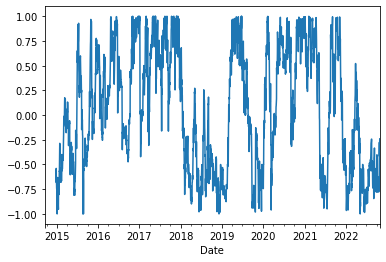

In [54]:
murray(btc).plot()

In [55]:
sig = murray(btc).dropna()


signals = []

for i in sig:
    if i <-0.9:
        signals.append(1)
    else:
        signals.append(0)
        


In [56]:
btc = btc['Close'][sig.index[0]:]


In [57]:
returns = backtester(signals,btc)
dd = max_dd(returns.pct_change().dropna().values.ravel())
wr = win_rate(pd.Series(signals), returns)

<AxesSubplot:xlabel='Date'>

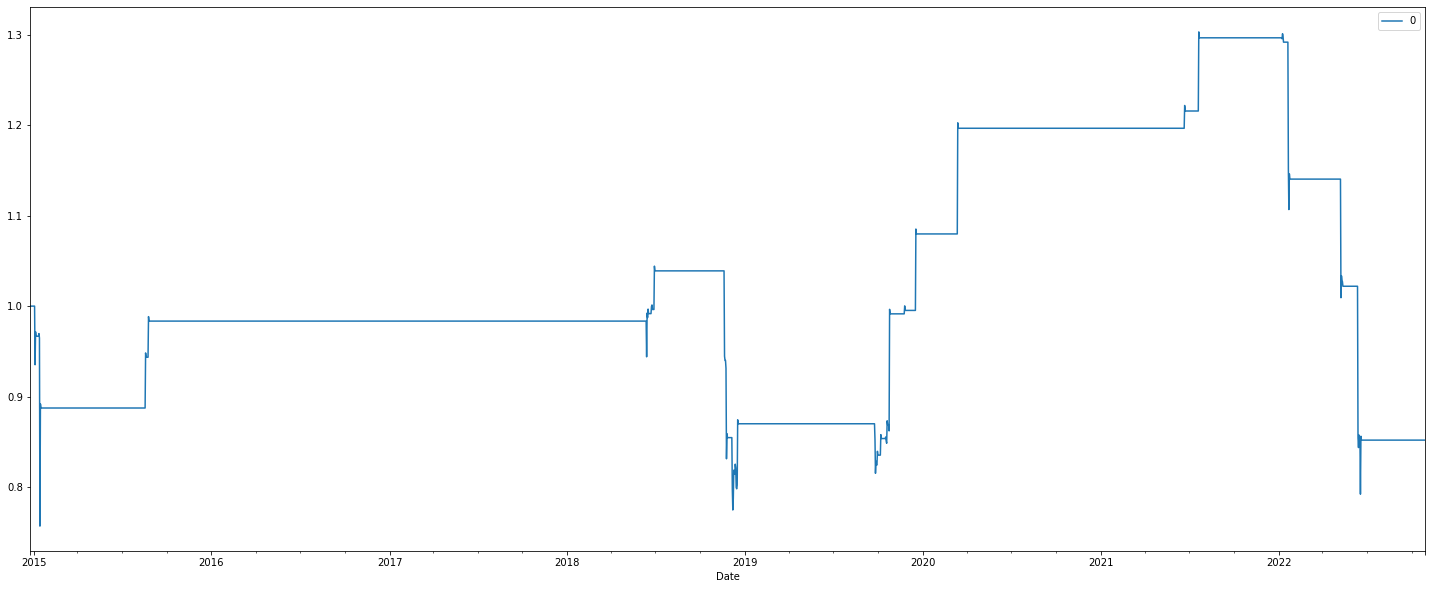

In [58]:
returns.plot(figsize=(25,10))

In [40]:
dd

-0.3919287870372453

In [41]:
wr

0.0013966480446927375

In [59]:
display('Strat',(returns.iloc[-1]-1)[0])
display('BTC',(btc/btc[0]).iloc[-1]-1)

'Strat'

-0.14803302818352948

'BTC'

64.48251329203327

<AxesSubplot:xlabel='Date'>

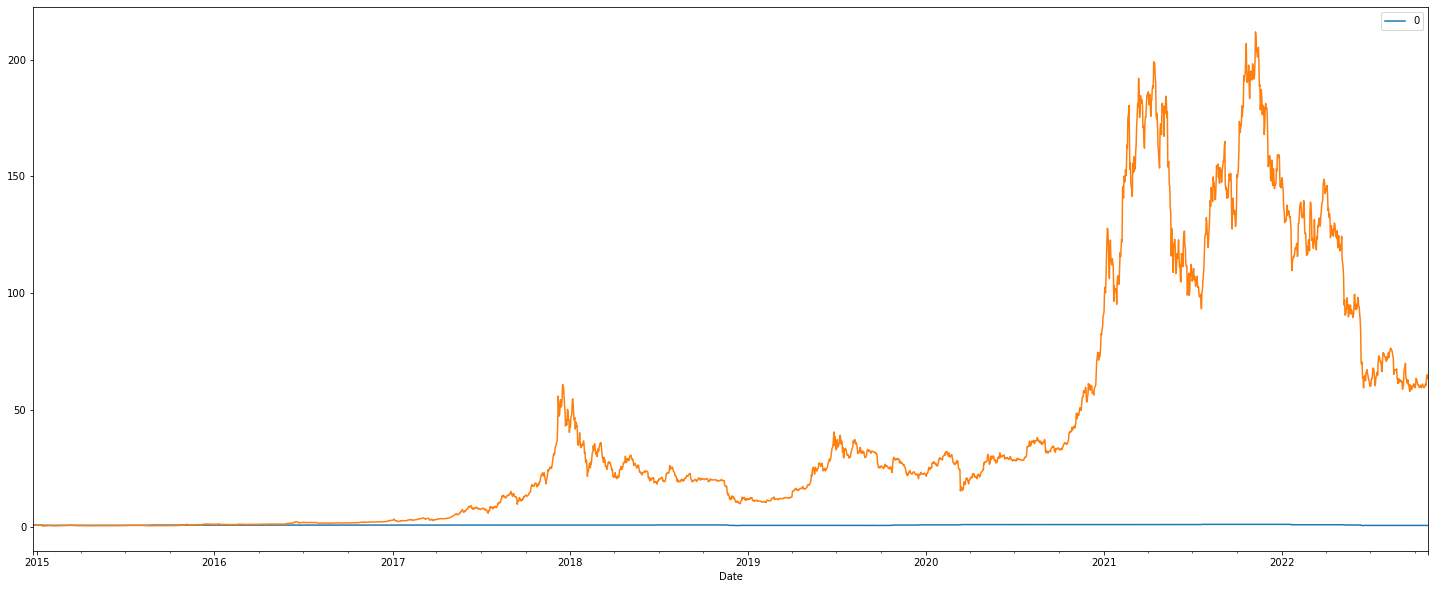

In [60]:
returns.plot(figsize=(25,10))
(btc/btc[0]).plot()